In [1]:
#!/usr/bin/env python

import os, sys, glob

sys.path.append('/camp/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/')

import numpy as np
from skimage.util import img_as_float32, img_as_uint, img_as_int
import skimage.io as io
import tensorflow as tf

%load_ext autoreload
%autoreload 2



2023-08-07 12:45:06.978114: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 12:45:33.528822: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# example for github repo

In [2]:
from pyimcyto.seg import deepimcyto
weights = '/camp/lab/swantonc/working/Alastair/pipeline_tests/PHLEX_testing/deep-imcyto_weights'
dicy = deepimcyto(weights)


2023-08-07 12:47:13.662146: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/camp/home/magnesa/.conda/envs/rapids-22.02/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Initialised deep-imcyto model.


In [6]:
image_paths = glob.glob('./pyimcyto/data/*.png')
image_paths.sort()

for path in image_paths:
    
    # read in image
    image = io.imread(path)

    # In this example predict on 512x512 region in center of image:
    tile = image[image.shape[0]//2 - 256:image.shape[0]//2 + 256, image.shape[1]//2 - 256:image.shape[1]//2 + 256]
    dicy.predict(tile)

    break

(1, 512, 512, 1)


2023-08-07 12:49:32.817162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


(1, 512, 512, 1)
      1/Unknown - 7s 7s/step(1, 512, 512, 1)
      2/Unknown - 10s 3s/step(1, 512, 512, 1)


/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/util.py:25: RuntimeWarning: invalid value encountered in divide
  crop = crop / np.amax(crop)


4/4 [==============================] - 23s 5s/step
(1, 512, 512, 1)


2023-08-07 12:49:55.751832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 7s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 13s 3s/step
(1, 512, 512, 1)


2023-08-07 12:50:08.546431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/rapids-22.02/lib/python3.8/site-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 1100 fits in uint16
  return _convert(image, np.uint16, force_copy)


1/1 [==============================] - 0s 15ms/step


/camp/home/magnesa/.conda/envs/rapids-22.02/lib/python3.8/site-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 1166 fits in uint16
  return _convert(image, np.uint16, force_copy)
0it [00:00, ?it/s]/camp/home/magnesa/.conda/envs/rapids-22.02/lib/python3.8/site-packages/skimage/_shared/utils.py:112: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  return func(*args, **kwargs)
13it [00:03,  3.68it/s]
/camp/home/magnesa/.conda/envs/rapids-22.02/lib/python3.8/site-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int64 to uint16 without scaling because max value 1100 fits in uint16
  return _convert(image, np.uint16, force_copy)


In [7]:
# get boundaries and overlay on test images

dicy.get_boundaries() # get boundaries of instance mask
dicy.make_overlays() # overlay on test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


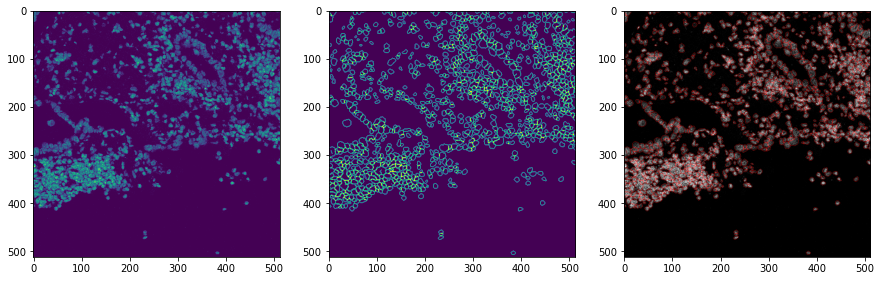

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
image = dicy.test_images[0]
mask = dicy.prediction_boundaries[0]
overlay = dicy.overlays[0]
ax[0].imshow(image)
ax[1].imshow(mask)
ax[2].imshow(overlay)

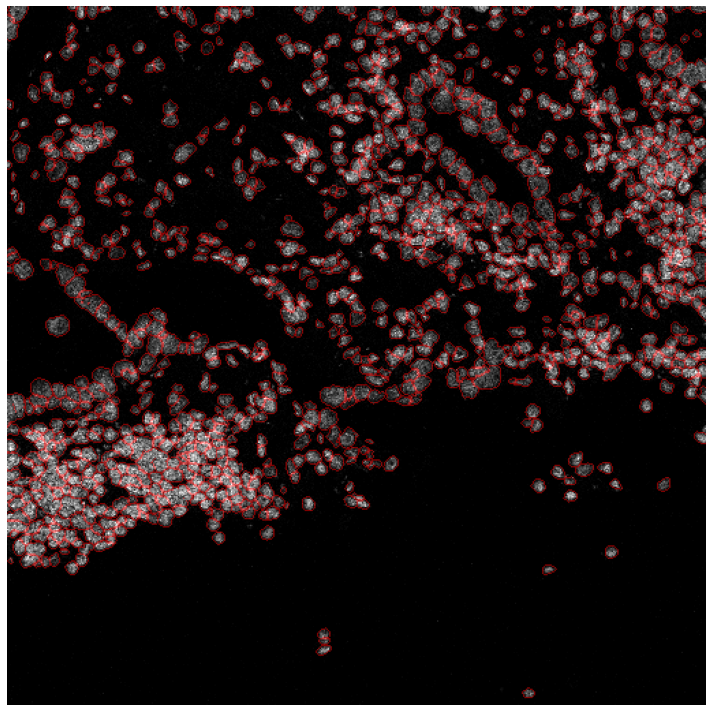

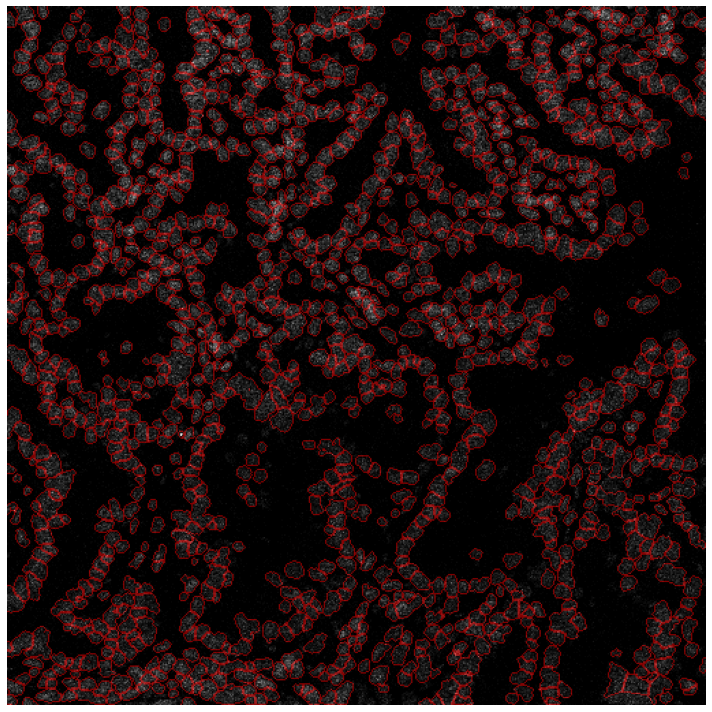

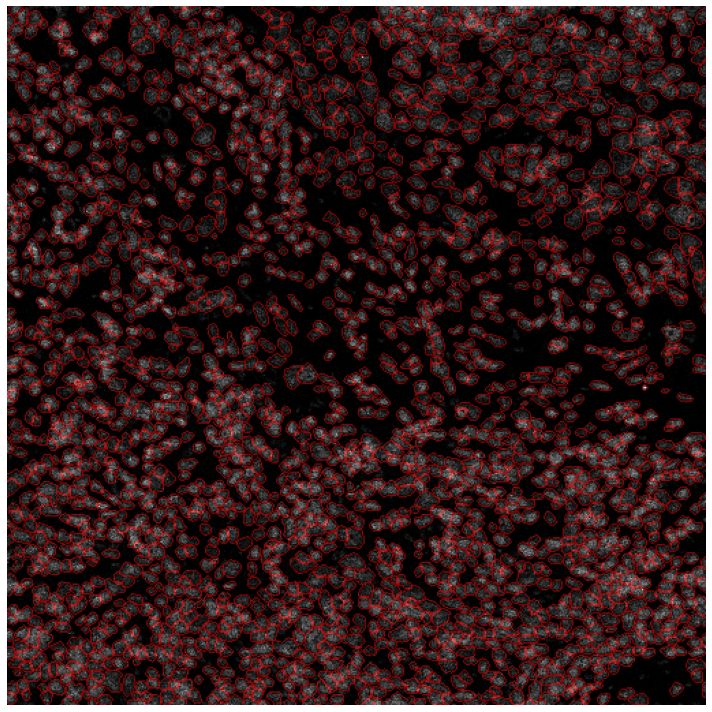

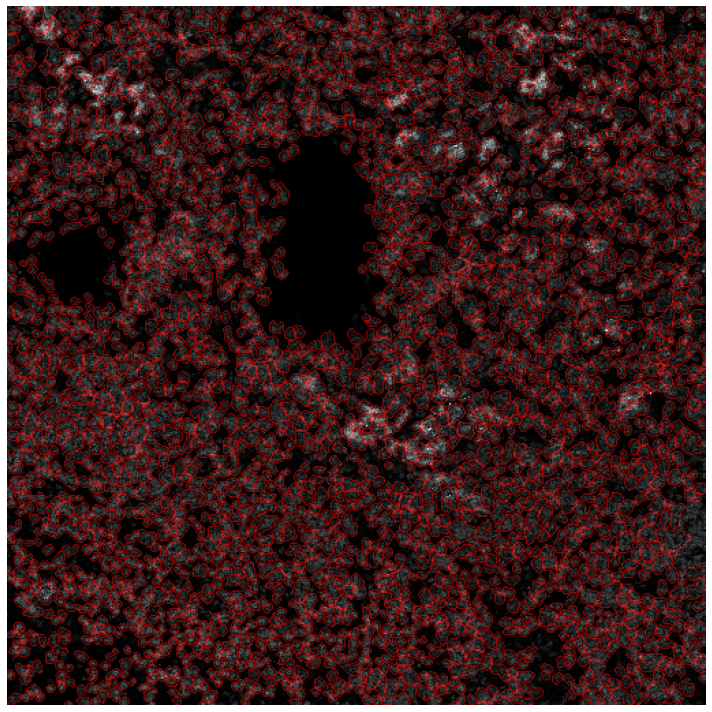

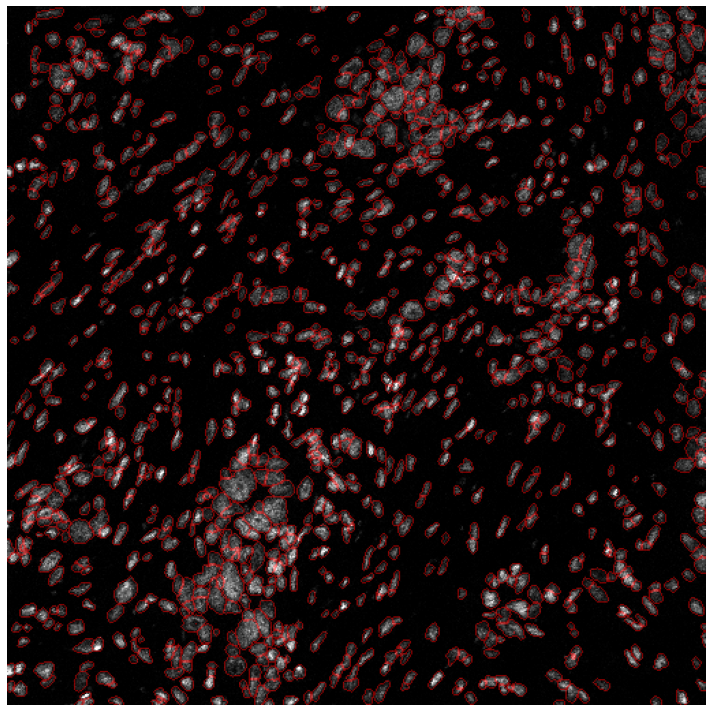

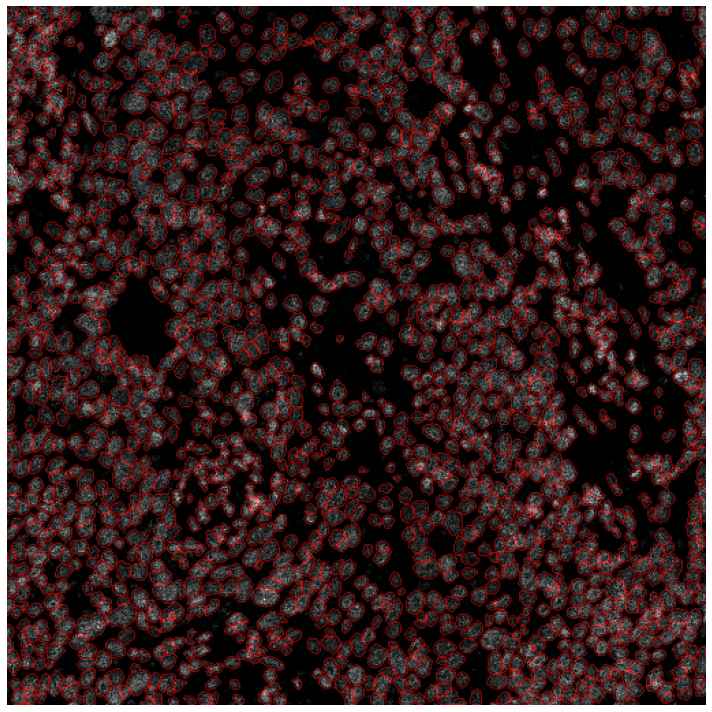

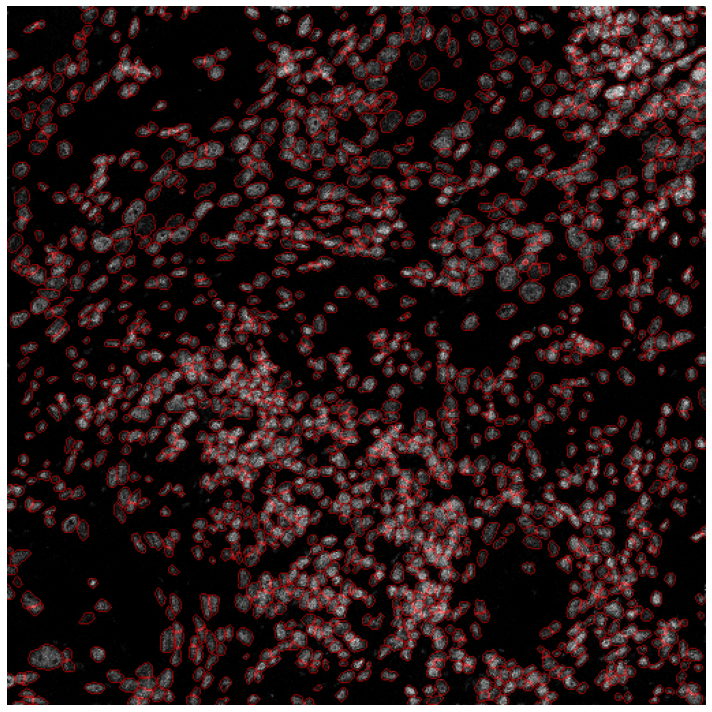

In [32]:
outdir = './docs/images'
if not os.path.exists(outdir):
    os.makedirs(outdir)

for i, overlay in enumerate(dicy.overlays):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    imagename = image_paths[i].split('/')[-1].replace('.png', '')
    ax.imshow(overlay)
    ax.set_axis_off()
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, f'overlay_{imagename}.png'.format(overlay.shape[0])), dpi=300)